# Image Analysis & Segmentation with Scikit-Image and OpenCV [ Python ]

In [62]:
#Imports
import numpy as np

import cv2
from skimage import io as skio
from skimage.filters import sobel
from skimage import morphology
from scipy import ndimage as ndi
from skimage.color import rgb2gray


import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
url = 'https://i.dailymail.co.uk/i/pix/2012/11/10/article-2230965-15F41C78000005DC-982_306x423.jpg'
img = skio.imread(url)


In [64]:
print ("image size {}".format(img.shape))
print ("dtype of image {}".format(img.dtype))

image size (423, 306, 3)
dtype of image uint8


## Display Image and Histogram

Text(0.5,1,'histogram of gray values')

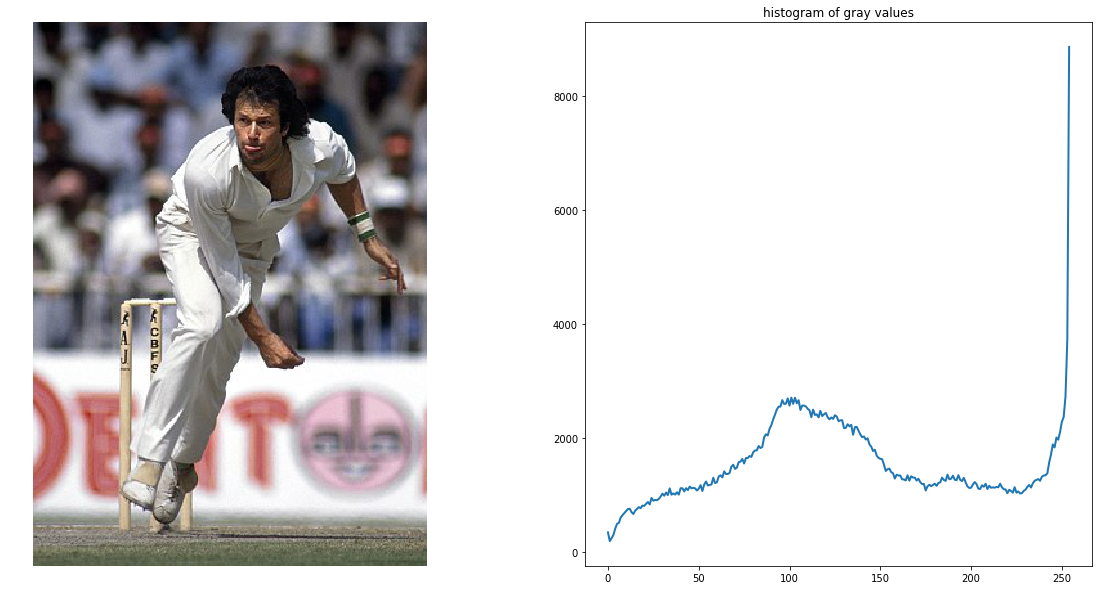

In [65]:
hist = np.histogram(img, bins=np.arange(0, 256))

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of gray values')

## Image to GrayScale and Histogram

Text(0.5,1,'histogram of gray values')

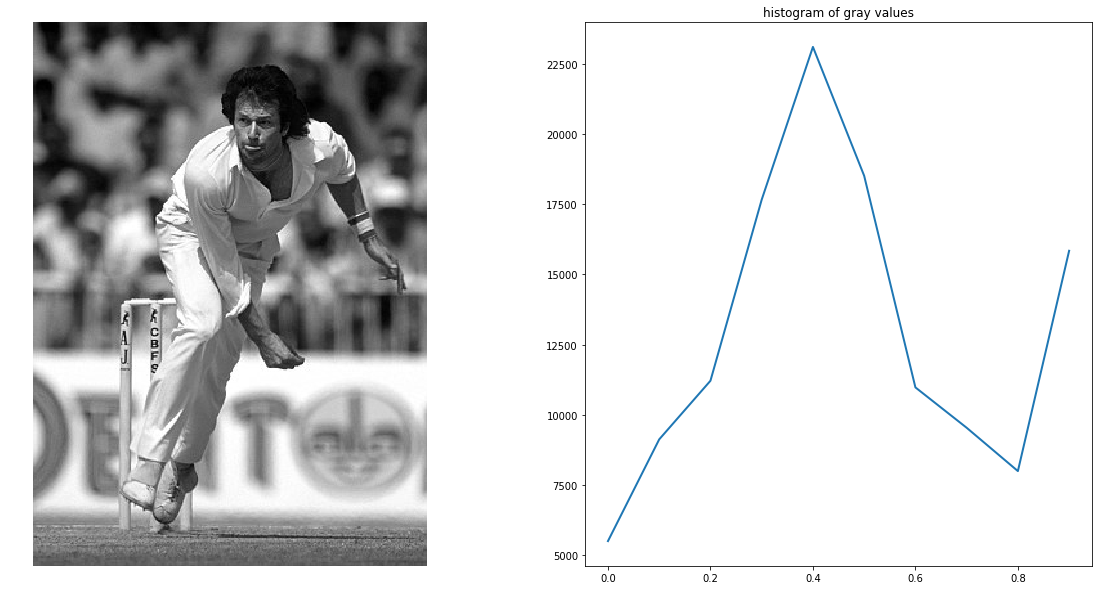

In [66]:
gray = rgb2gray(img)

hist = np.histogram(gray)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of gray values')

## Boundaries With Sobel Filter

(-0.5, 305.5, 422.5, -0.5)

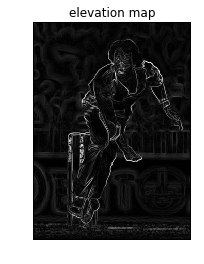

In [67]:
elevation_map = sobel(gray)

fig, ax = plt.subplots()
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')

## Otsu thresholding

0.4195719401041667


Text(0.5,1,'mask')

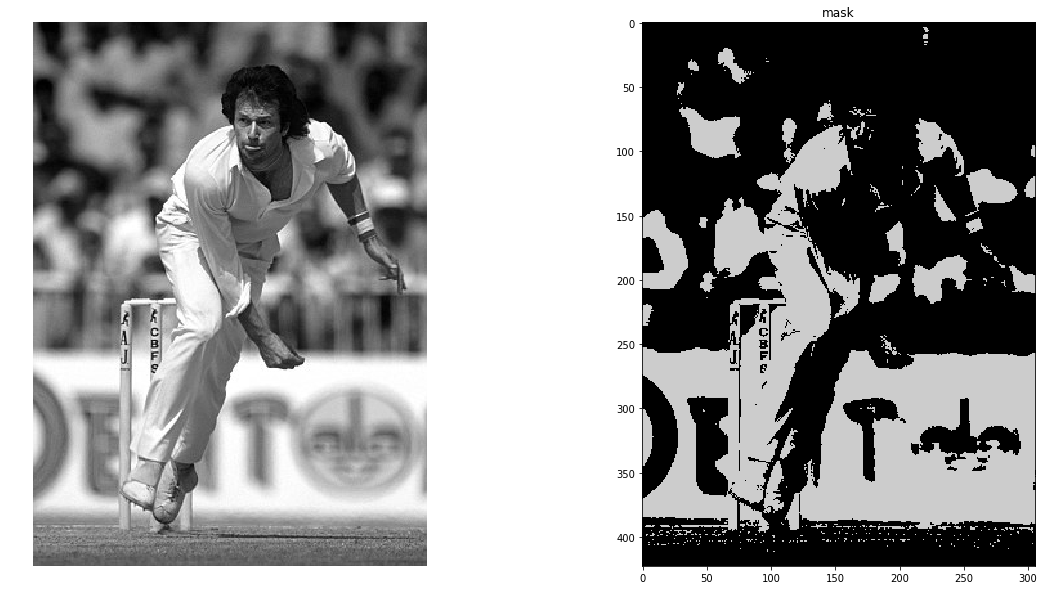

In [68]:
from skimage import data
from skimage import filters
threshold = filters.threshold_otsu(gray)
threshold_marker = gray > threshold
print (val)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].imshow(threshold_marker, cmap=plt.cm.nipy_spectral, interpolation='nearest')
axes[1].set_title('mask')

## Segmentation with Watershed Algo, using above obtained threshold

/home/kamal/exp/portfolio/computer_vision/venv/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


(-0.5, 305.5, 422.5, -0.5)

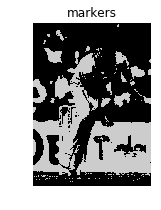

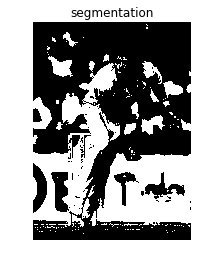

In [71]:
markers = np.zeros_like(gray)
markers[gray < threshold] = 1
markers[gray > threshold] = 2
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')

segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots()
ax.imshow(segmentation, cmap='gray', interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')

## Labeling the Image

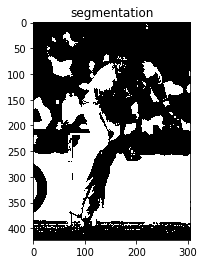

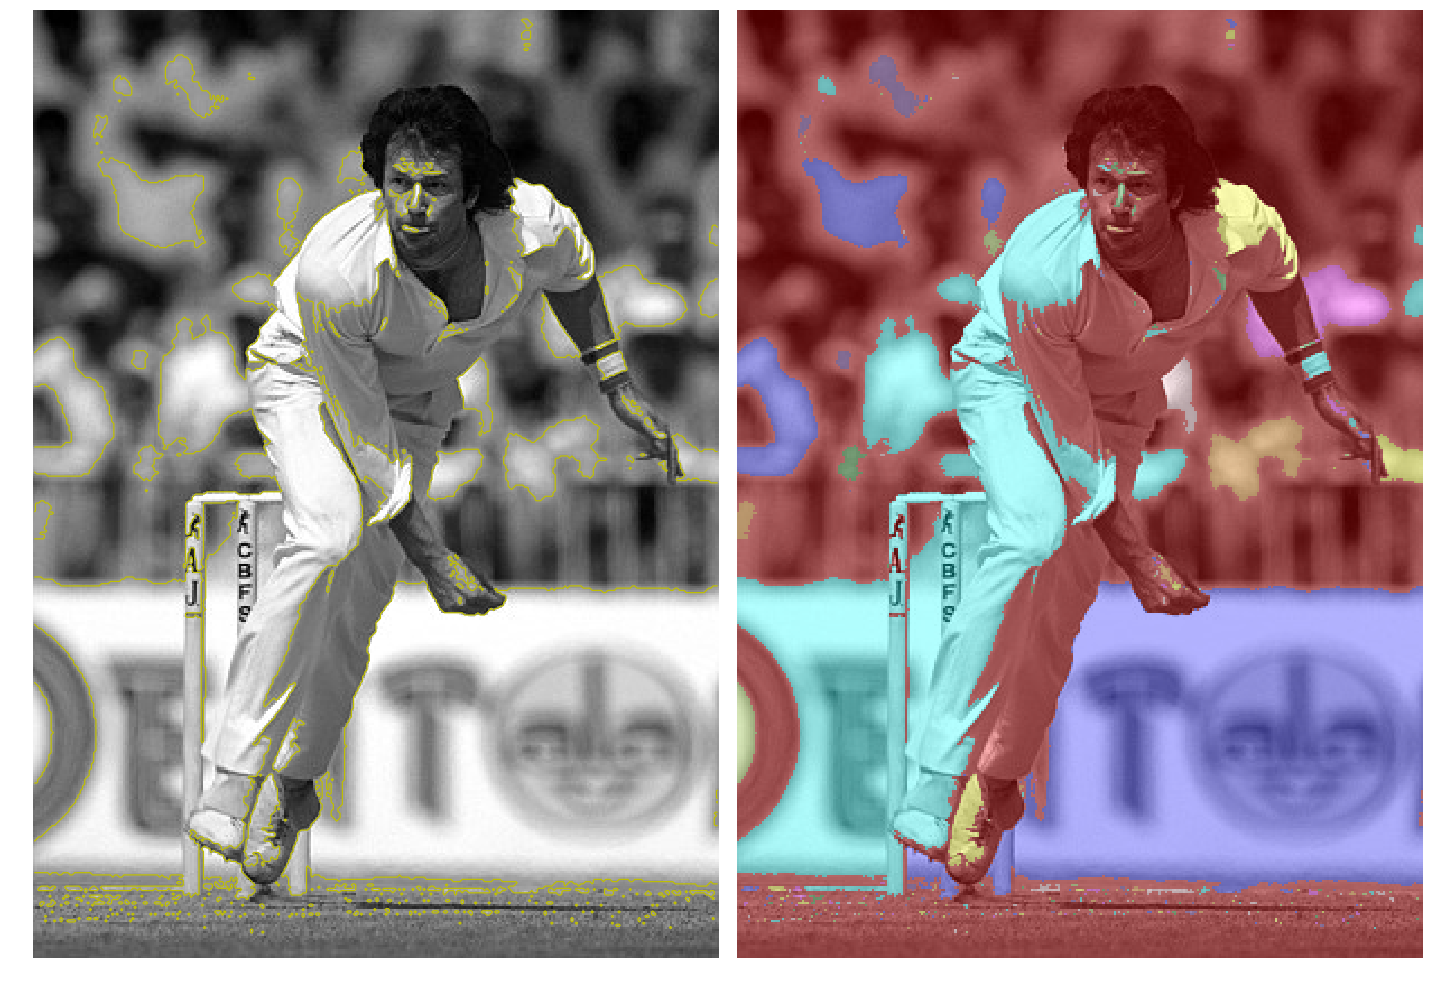

In [80]:
from skimage.color import label2rgb

filled_segmentation = ndi.binary_fill_holes(segmentation-1)
fig, ax = plt.subplots()
ax.imshow(filled_segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
labelled_image, _ = ndi.label(filled_segmentation)
image_label_overlay = label2rgb(labelled_image, image=gray)
fig, axes = plt.subplots(1, 2, figsize=(20, 20), sharey=True)
axes[0].imshow(gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(filled_segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()